In [2]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("comedy_show.csv")
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [3]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df["Nationality"] = df["Nationality"].map(d)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,NO
1,42,12,4,1,NO
2,23,4,6,2,NO
3,52,4,4,1,NO
4,43,21,8,1,YES
5,44,14,5,0,NO
6,66,3,7,2,YES
7,35,14,9,0,YES
8,52,13,7,2,YES
9,35,5,9,2,YES


In [4]:
df["Go"] = df["Go"].map({'YES': 1, 'NO': 0})
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [5]:
# Then we have to separate the feature columns from the target column.
# The feature columns are the columns that we try to predict from, and the target column is the column with the values we try to predict.

features = ["Age", "Experience", "Rank", "Nationality"]

X = df[features]
y = df["Go"]

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [6]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)


[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Experience <= 12.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

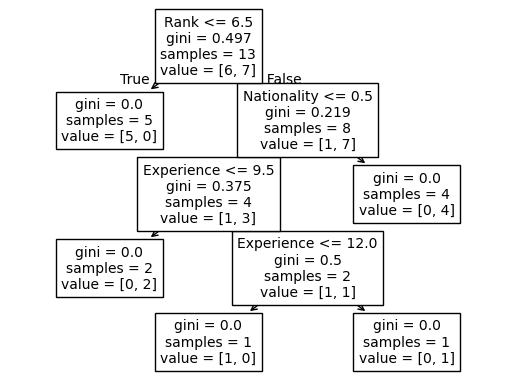

In [7]:
tree.plot_tree(dtree, feature_names=features)

In [9]:
# We can use the Decision Tree to predict new values.
# Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

print(dtree.predict([[40, 10, 6, 1]]))
print("[1] means 'GO'")
print("[0] means 'NO'")

[0]
[1] means 'GO'
[0] means 'NO'


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
